In [1]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r X_val
%store -r y_val

%store -r y


## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [2]:
y.value_counts()

Exited
0    7962
1    2037
Name: count, dtype: int64

In [3]:
from sklearn.utils  import class_weight
weights = class_weight.compute_class_weight(class_weight= 'balanced', 
                                            classes=np.unique(y_train),
                                            y= y_train)
weights
# this method will be in array format so ...

array([0.6279686 , 2.45360429])

In [4]:
# i will tranform it to dict bcause keras take a dictionary as inputs 
weights = dict(enumerate(weights))
weights

{0: 0.6279685966633954, 1: 2.4536042944785277}

### Create The Model

In [5]:
import tensorflow as tf

tf.random.set_seed(42)
## Dense to build hidden & output  lyer
model_balanced = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),

    Dense(units=1, activation= 'sigmoid')  
])

In [6]:
#compile the model
model_balanced.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [7]:
history = model_balanced.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=100, class_weight=weights, verbose=1)

Epoch 1/100


200/200 [==============================] - 2s 3ms/step - loss: 0.6057 - accuracy: 0.6721 - val_loss: 0.5557 - val_accuracy: 0.7400
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.7382 - val_loss: 0.4725 - val_accuracy: 0.7900
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.7582 - val_loss: 0.4839 - val_accuracy: 0.7763
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.7639 - val_loss: 0.4256 - val_accuracy: 0.8062
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.7701 - val_loss: 0.5320 - val_accuracy: 0.7394
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7789 - val_loss: 0.4994 - val_accuracy: 0.7569
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4699 - accuracy: 0.7778 - val_loss: 0.4239 - val_accuracy: 0.8119
Epoch 8/100

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [8]:
# Plot the model history to observe the changing of metrics
model_balanced.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

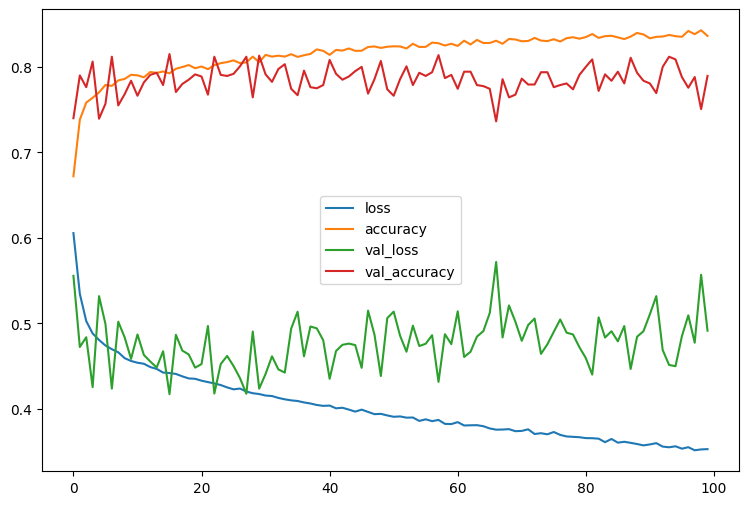

In [9]:
pd.DataFrame(history.history).plot(figsize=(9,6))
plt.show()

In [10]:
model_balanced.evaluate(X_val, y_val, verbose=0)

[0.49156832695007324, 0.7893750071525574]

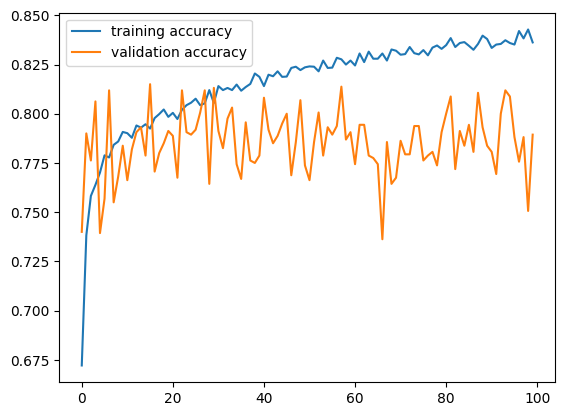

In [11]:
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()


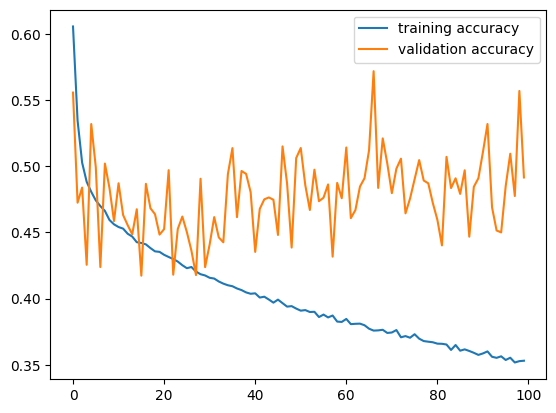

In [12]:
plt.plot(history.history["loss"], label="training accuracy")
plt.plot(history.history["val_loss"], label="validation accuracy")
plt.legend()
plt.show()

In [13]:
# Model prediction
y_pred_balanced = model_balanced(X_val) > 0.5


In [14]:
# Model Evaluation
# see "confusion matrix" and "classification report"

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print(confusion_matrix(y_val, y_pred_balanced))
print(classification_report(y_val, y_pred_balanced))

[[1031  243]
 [  94  232]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1274
           1       0.49      0.71      0.58       326

    accuracy                           0.79      1600
   macro avg       0.70      0.76      0.72      1600
weighted avg       0.83      0.79      0.80      1600



50/50 [==============================] - 0s 2ms/step


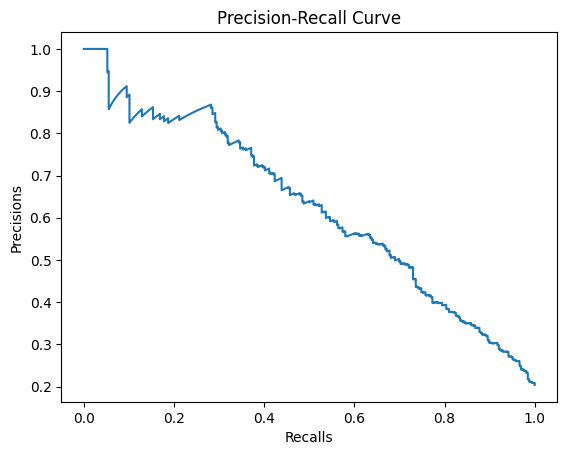

In [15]:
from sklearn.metrics import precision_recall_curve


y_pred_proba = model_balanced.predict(X_val)
precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred_proba)
plt.plot(recalls, precisions)
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [16]:
tf.random.set_seed(42)
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),

    Dense(units=1, activation= 'sigmoid')  
])
# optimizer > minmize the error

In [17]:
model_balanced.compile(tf.keras.optimizers.Adam(learning_rate=0.01),
                        loss='binary_crossentropy', 
                        metrics=['accuracy'])

#lr determines the step size at each iteration while moving toward a minimum of a loss function.

In [18]:
history = model_balanced.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=100, class_weight=weights, verbose=1)

Epoch 1/100
200/200 [==============================] - 2s 2ms/step - loss: 0.4933 - accuracy: 0.7761 - val_loss: 0.4882 - val_accuracy: 0.7856
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4589 - accuracy: 0.7848 - val_loss: 0.4454 - val_accuracy: 0.8000
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4558 - accuracy: 0.7898 - val_loss: 0.4929 - val_accuracy: 0.7694
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.7878 - val_loss: 0.4794 - val_accuracy: 0.7738
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.7804 - val_loss: 0.5112 - val_accuracy: 0.7606
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.7878 - val_loss: 0.4956 - val_accuracy: 0.7631
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.7918 - val_loss: 0.4884 - val_accuracy: 0.7706

In [19]:
y_pred = model_balanced.predict(X_val) > 0.5
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
# راح اكتب استنتاجات هنا بعد ماضبطنا الليرنق ريت 

50/50 [==============================] - 0s 1ms/step
[[972 302]
 [ 96 230]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1274
           1       0.43      0.71      0.54       326

    accuracy                           0.75      1600
   macro avg       0.67      0.73      0.68      1600
weighted avg       0.81      0.75      0.77      1600



50/50 [==============================] - 0s 1ms/step


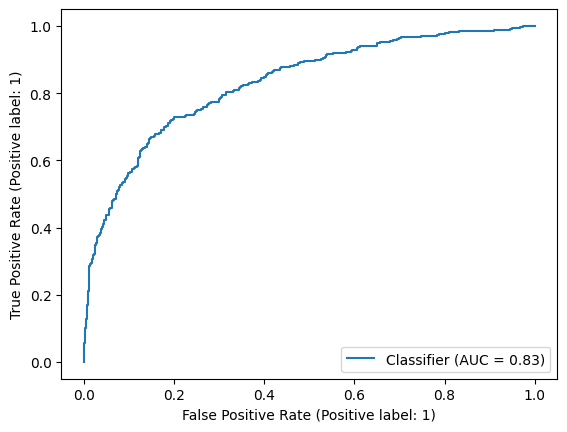

In [20]:
from sklearn.metrics import RocCurveDisplay


y_pred = model.predict(X_val)
RocCurveDisplay.from_predictions(y_val, y_pred_proba)

 1/50 [..............................] - ETA: 1s

50/50 [==============================] - 0s 1ms/step


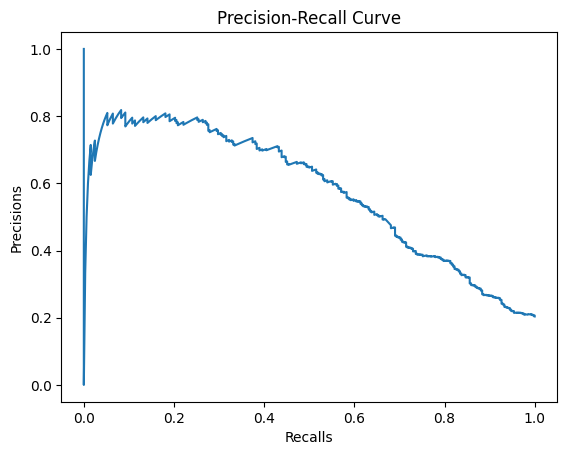

In [21]:
y_pred = model_balanced.predict(X_val) 
precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred)
plt.plot(recalls, precisions)
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision-Recall Curve")
plt.show()

#  راح اكتب استنتاجات هنا من الرسمه 

### Add Dropout Layer

In [22]:
tf.random.set_seed(42)
from tensorflow.keras.layers import Dropout
#The optimal dropout rate depends on the size and complexity of your network, the amount and quality of your data, and your training objectives. A common practice is to start with a low dropout rate, such as 0.1 or 0.2, 
#and increase it gradually until you reach a satisfactory trade-off between bias and variance
model_balanced = Sequential([
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


# Compile the model 
model_balanced.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=(0.01)),
                       loss=tf.keras.losses.binary_crossentropy,
                       metrics= ['accuracy'])

In [23]:
model_balanced.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=100, verbose=1 ,class_weight=weights)

Epoch 1/100
200/200 [==============================] - 2s 3ms/step - loss: 0.6288 - accuracy: 0.6615 - val_loss: 0.5611 - val_accuracy: 0.7250
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5474 - accuracy: 0.7539 - val_loss: 0.4432 - val_accuracy: 0.8263
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5268 - accuracy: 0.7722 - val_loss: 0.4731 - val_accuracy: 0.7931
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7690 - val_loss: 0.4229 - val_accuracy: 0.8319
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.7711 - val_loss: 0.5081 - val_accuracy: 0.7400
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7748 - val_loss: 0.4837 - val_accuracy: 0.7563
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5072 - accuracy: 0.7687 - val_loss: 0.4294 - val_accuracy: 0.8144

In [24]:
loss, accuracy = model_balanced.evaluate(X_val, y_val, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4311619997024536
accuracy:  0.7850000262260437


In [25]:
y_pred = model_balanced.predict(X_val) > 0.5
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

50/50 [==============================] - 0s 2ms/step
[[1006  268]
 [  76  250]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1274
           1       0.48      0.77      0.59       326

    accuracy                           0.79      1600
   macro avg       0.71      0.78      0.72      1600
weighted avg       0.84      0.79      0.80      1600



In [30]:
%store X_train
%store X_test
%store y_train
%store y_test


%store y
%store weights


Stored 'X_train' (ndarray)
Stored 'X_test' (DataFrame)
Stored 'y_train' (Series)
Stored 'y_test' (Series)
Stored 'y' (Series)
Stored 'weights' (dict)
